# Example script for ysprod

### This script demonstrates the usage of ysprod and ysprod181003550 as presented in arxiv:18100.3550

#### Conventions:

There is a conveniton choice for the sign of the complex part of the ringdown frequency that translates into a convention for the sign of the complex part of the inner-product.


By default, $\omega_{\ell m n}$, sep_const = positive.leaver(dimensionless_spin,l,m,n=0,...)[0], outputs QNM frequencies with negative valued complex part. This corresponds to a multipolar convention in which there is an explicity minus sign in the definition of the time domain phase: $h_{\ell m n} = A_{\ell m n} \; exp(-im\omega_{\ell m n})$. However, when considering spherical harmonic moments (eg from NR), a common convention is that positive $m$ moments (ie "modes") have positive frequencies. In that context, we are interested in $h_{\ell m n} = A_{\ell m n} \; exp(im\omega*_{\ell m n})$, where $\omega*_{\ell m n}$ is the complex conjugate of $\omega_{\ell m n}$. As a result, it is necessary to consider the complex conjugate of output from ysprod when seeking to convert from spherical to spheroidal data.


In short, if the your spherical harmonic mass-quadrupole (\ell,m)=(2,2), has positive frequencies, then you'll want conj( ysprod(...) ).

### Import usefuls

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from positive import *
from nrutils.core.units import *
from matplotlib.pyplot import *
from numpy import *

(positive)>> Applying custom matplotlib settings.


### Define multipole indeces

In [ ]:
#
dimensioless_bh_spin = linspace(0,0.99,2e2)

# Define spherical indeces
L,M = 3,2

# Define spheroidal indeces 
lmn = (2,2,0)

### Calculate numerical inner-products
Note that the conjugate is taken

In [32]:
# Calculate spherical-spheroidal
sigma = array([ ysprod( j, L, M, lmn ) for j in dimensioless_bh_spin ]).conj()

### Evaluate related model
Note that the conjugate is taken

In [33]:
# 
sigma_from_model = ysprod181003550( dimensioless_bh_spin, L, M, lmn ).conj()

### Plot for comparison

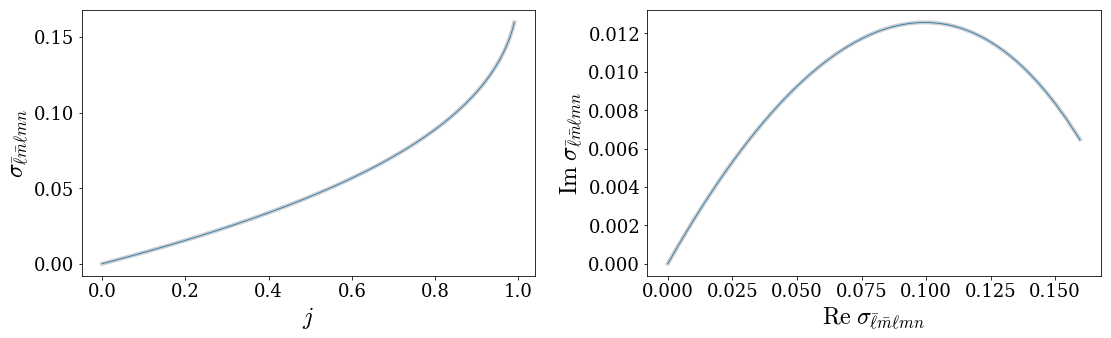

In [34]:
#
figure( figsize=1.2*figaspect(0.618/2) )

#
subplot(1,2,1)
plot( dimensioless_bh_spin, abs(sigma), lw=4, color='k', alpha=0.2 )
plot( dimensioless_bh_spin, abs(sigma_from_model), ls='-' )
xlabel('$j$')
ylabel(r'$\sigma_{\bar{\ell}\bar{m}\ell m n}$')

#
subplot(1,2,2)
plot( sigma.real, sigma.imag, lw=4, color='k', alpha=0.2 )
plot( sigma_from_model.real, sigma_from_model.imag, ls='-' )
xlabel(r'$\mathrm{Re} \; \sigma_{\bar{\ell}\bar{m}\ell m n}$')
ylabel(r'$\mathrm{Im} \; \sigma_{\bar{\ell}\bar{m}\ell m n}$')

#
tight_layout(w_pad=2)